In [1]:
from sklearn.datasets import load_iris
import numpy as np
from Knn1 import KNN, train_test_split_func
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib as mpl
from sklearn.ensemble import BaggingRegressor

In [2]:
iris = load_iris()

X = iris.data
Y = iris.target

Y.shape

(150,)

In [3]:
X_train, X_test, y_train, y_test = train_test_split_func(X, Y, test_size=0.15)


In [4]:
knn = KNN(k=1)

knn.fit(X_train, y_train)

In [6]:
accu_list = []
for i in range(1, 16, 2):
    knn.k = i
    accu = knn.evaluate(X_test, y_test) * 100
    accu_list.append(accu)
    print(accu)

91.30434782608695
91.30434782608695
86.95652173913044
86.95652173913044
86.95652173913044
86.95652173913044
86.95652173913044
86.95652173913044


In [7]:
height = range(1, 16, 2)

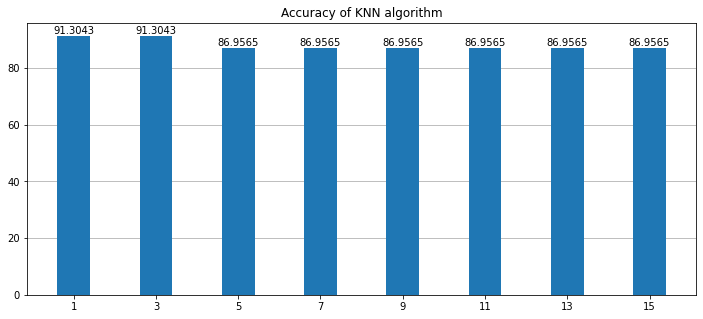

In [8]:
plt.figure(figsize = (12, 5))
p = plt.bar(height, accu_list, bottom=None, align='center', data=None, zorder = 3 )
plt.bar_label(p)
plt.grid(axis = 'y')
plt.xticks(height)
plt.title("Accuracy of KNN algorithm")
plt.show()

### Apply KNN algorithm on abalone dataset

In [186]:
abalone = pd.read_csv('abalone.data', header=None)

In [187]:
abalone.head(2)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [188]:
abalone.columns = [
    'Sex',
    'Length',
    'Diameter',
    'Height',
    'Whole weight',
    'Shucked weight',
    'Vicsera weight',
    'Shell weight',
    'Rings'
]

In [189]:
abalone.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Vicsera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [190]:
abalone = abalone.drop('Sex', axis=1)

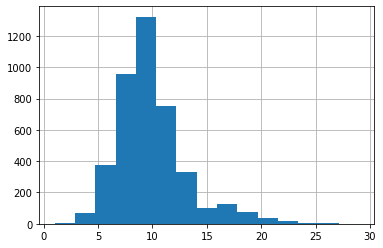

In [191]:
abalone['Rings'].hist(bins=15, zorder=2)
plt.show()

In [192]:
colloration_matrix = abalone.corr()
colloration_matrix['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Vicsera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [193]:
X = abalone.drop('Rings', axis=1)
X = X.values
y = abalone['Rings']
y = y.values


In [194]:
new_data_point = np.array([
         0.569552,
         0.446407,
         0.154437,
         1.016849,
         0.439051,
         0.222526,
         0.291208,
])

In [195]:
distances = np.linalg.norm( X - new_data_point, axis=1)

In [196]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644], dtype=int64)

In [197]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10], dtype=int64)

In [198]:
prediction = nearest_neighbor_rings.mean()

#### Using scikit-learn for the same age prediction

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [200]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [201]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

#### Computing the RMSE, Root Mean Square Error via mean_squared_error method in sklearn.metrics module

In [202]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(train_preds, y_train)
rmse = sqrt(mse)
rmse

1.6538366794859511

In [203]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

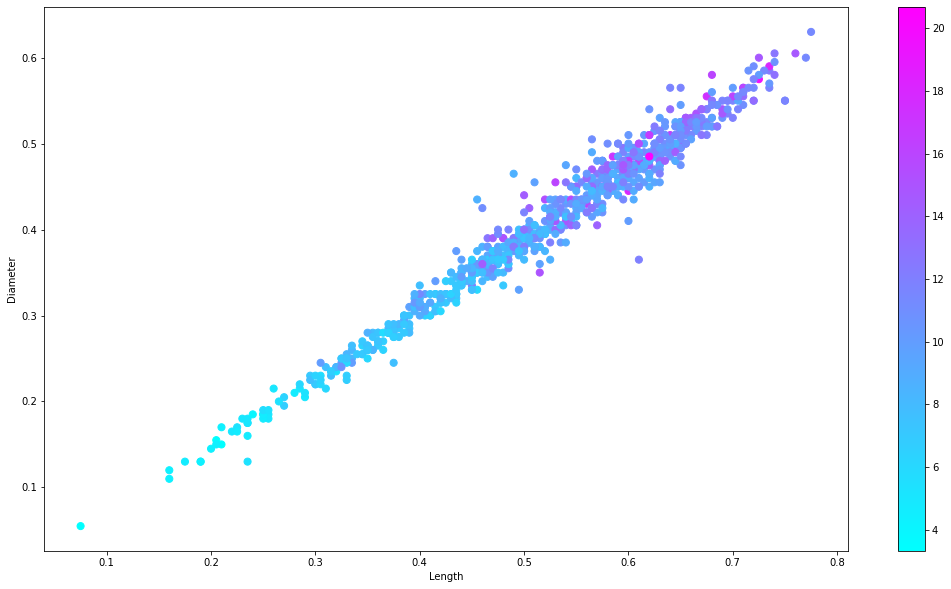

In [230]:
cmap = mpl.colormaps['cool']

plt.figure(figsize=(18, 10))

plt.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)

plt.xlabel('Length')
plt.ylabel('Diameter')
plt.colorbar()
plt.show()


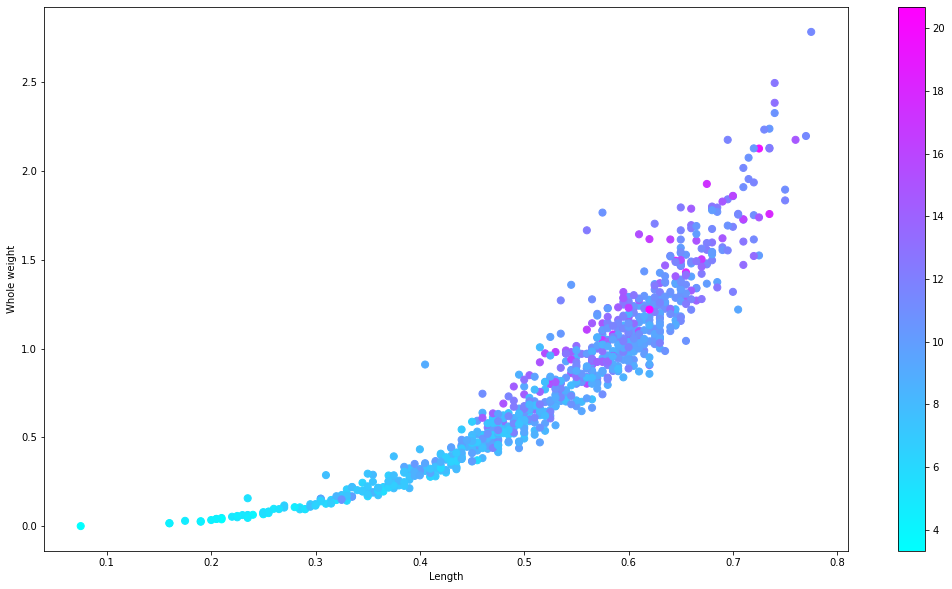

In [232]:
plt.figure(figsize=(18, 10))

plt.scatter(
    X_test[:, 0], X_test[:, 3], c=test_preds, s=50, cmap=cmap
)
plt.xlabel('Length')
plt.ylabel('Whole weight')
plt.colorbar()
plt.show()

#### Tune the algorithm

In [257]:
parameters = {'n_neighbors': range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [258]:
gridsearch.best_params_

{'n_neighbors': 25}

In [259]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

print(f"Train RMSE: {train_rmse} \nTest RMSE: {test_rmse}")

Train RMSE: 2.0731180327543384 
Test RMSE: 2.1700197339962175


#### Adding weighted average of neighbors based on distance

In [260]:
parameters = {'n_neighbors': range(1, 50),
              'weights': ['uniform', 'distance']
             }
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [261]:
gridsearch.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [262]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print(f"Improved algorithm with adding weighted average,\nThe test RMSE: {test_rmse}")

Improved algorithm with adding weighted average,
The test RMSE: 2.1634265584947485


#### further improvement with bagging

In [263]:
best_k = gridsearch.best_params_['n_neighbors']
best_weights = gridsearch.best_params_['weights']
bagged_knn = KNeighborsRegressor(
                                    n_neighbors=best_k,
                                    weights=best_weights
)


In [264]:
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [265]:
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=25,
                                                    weights='distance'),
                 n_estimators=100)

In [266]:
test_preds_bagging = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_bagging)
test_rmse = sqrt(test_mse)
print(f"Improved algorithm via bagging,\nThe test RMSE: {test_rmse}")

Improved algorithm via bagging,
The test RMSE: 2.160626824584385
